<a href="https://colab.research.google.com/github/NestorCervantes/IAyRD_2024/blob/main/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Actividad 6: Redes Neuronales.
# Nombre del alumno: Nestor Antonio Cervantes Estrada
# Matrícula: 2023965
# Hora: N4

In [27]:
# PASO 1. Ingresar librerías

import tensorflow as tf

from tensorflow.keras import datasets, layers, models # conjunto de datos
import matplotlib.pyplot as plt # graficar
import numpy as np

In [12]:
# PASO 2. Ingresar conjunto de datos

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print(len(train_images))
print(len(test_images))
print(train_images.shape)

60000
10000
(60000, 28, 28)


In [13]:
# PASO 3. Preprocesamiento de datos

# Normalización

train_images, test_images = train_images / 255.0, test_images / 255.0

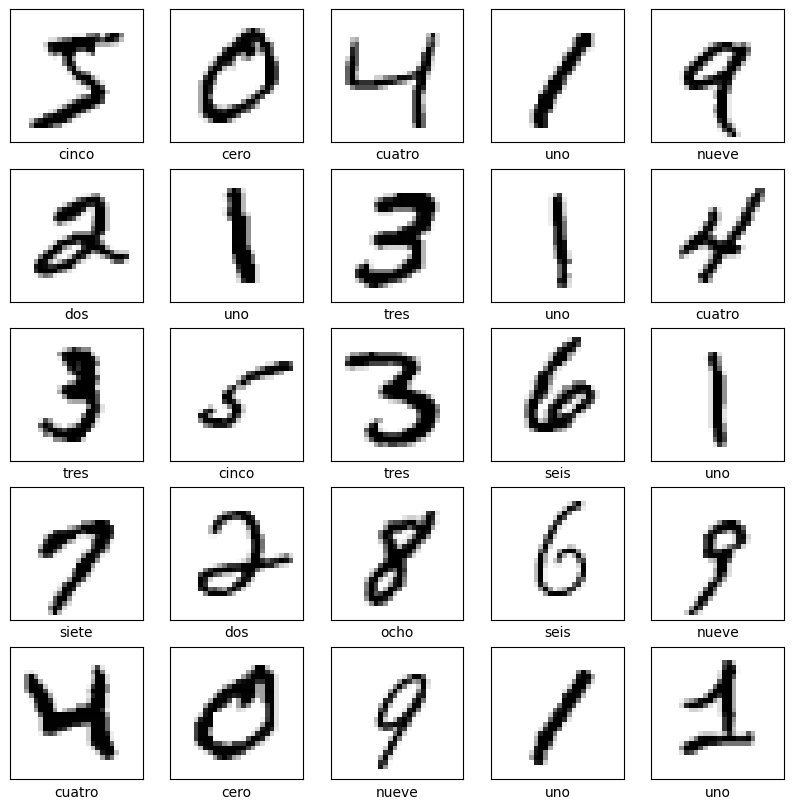

In [14]:
# Verificación

class_names = ['cero','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
# PASO 4. Selección y entrenamiento del modelo

# Selección y creación del modelo

model = models.Sequential()
model.add(layers.Conv2D(40, (1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(70, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(84, (3, 3), activation='relu'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 40)        80        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 40)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 70)          44870     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 70)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 84)          53004     
                                                                 
Total params: 97954 (382.63 KB)
Trainable params: 9795

In [17]:
# Capas de salida

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 40)        80        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 40)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 70)          44870     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 70)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 84)          53004     
                                                                 
 flatten (Flatten)           (None, 84)               

In [19]:
# Entrenamiento

model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=8,
                    validation_data=(test_images, test_labels))

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 49s 25ms/step - loss: 0.3876 - accuracy: 0.8809 - val_loss: 0.1950 - val_accuracy: 0.9371
Epoch 2/8
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1799 - accuracy: 0.9431 - val_loss: 0.1509 - val_accuracy: 0.9501
Epoch 3/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1481 - accuracy: 0.9535 - val_loss: 0.1238 - val_accuracy: 0.9593
Epoch 4/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1321 - accuracy: 0.9574 - val_loss: 0.1267 - val_accuracy: 0.9590
Epoch 5/8
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1186 - accuracy: 0.9614 - val_loss: 0.1124 - val_accuracy: 0.9619
Epoch 6/8
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1098 - accuracy: 0.9650 - val_loss: 0.1086 - val_accuracy: 0.9657
Epoch 7/8
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1020 - accuracy: 0.9669 - val_loss: 0.1054 - val_accuracy: 0.

313/313 - 2s - loss: 0.1132 - accuracy: 0.9636 - 2s/epoch - 7ms/step


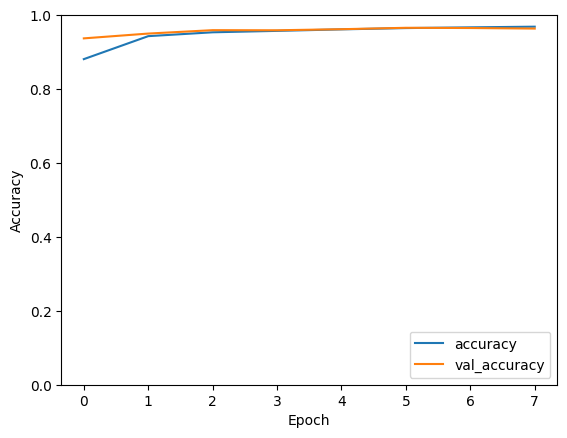

In [46]:
# Evaluación

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [25]:
# Paso 5. Predicción / Prueba

predictions = model.predict(test_images)

predictions[0]

313/313 [==============================] - 3s 10ms/step


array([1.7685780e-09, 1.3610726e-07, 5.4669258e-06, 1.6943073e-05,
       2.4129582e-07, 1.3812958e-08, 2.9615446e-13, 9.9995178e-01,
       1.2787965e-08, 2.5435220e-05], dtype=float32)

In [28]:
np.argmax(predictions[0])

7

In [29]:
test_labels[0]

7

In [30]:
# Grafica

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

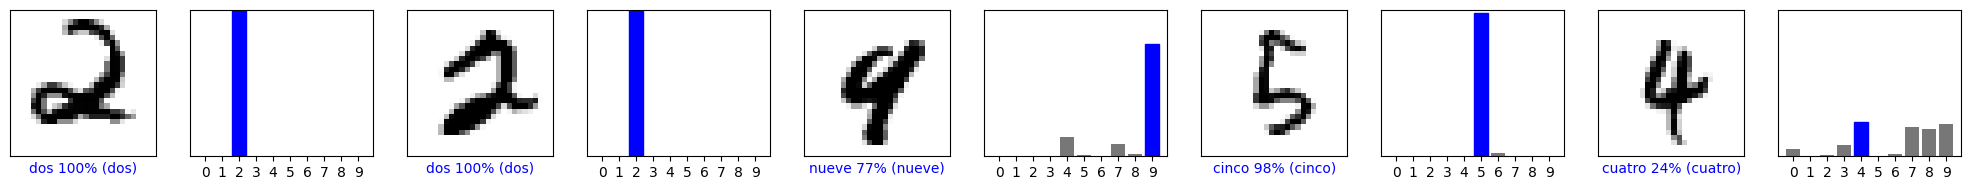

In [42]:
# Se seleccionan 5 imagenes al azar del lote de imagenes de prueba para hacer la predicción

import random

num_rows = 1
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Genera índices aleatorios para seleccionar imágenes al azar
random_indices = random.sample(range(len(test_images)), num_images)

for i, idx in enumerate(random_indices):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(idx, predictions[idx], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(idx, predictions[idx], test_labels)

plt.tight_layout()
plt.show()

In [44]:
"""
PREGUNTAS

¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5? En esta
actividad utilicé 8 epocas en lugar de 50, como se hizo en la actividad pasada. Aún así, la precision del entrenamiento no se aleja demasiado
una de la otra. Hay que considerar tambien que en esta actividad se alteraron el tamaño de algunas capas neuronales, así como la funcion optimizadora,
que paso de ser adam a adamax

¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué? Si, ya que realicé varias predicciones de 5 imagenes al azar, y
observé menos errores que en el modelo de red neuronal anterior. Y de los pocos errores que observé, eran justificados.

"""



'\nPREGUNTAS\n\n¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5? En esta \nactividad utilicé 8 epocas en lugar de 50, como se hizo en la actividad pasada. Aún así, la precision del entrenamiento no se aleja demasiado\nuna de la otra. Hay que considerar tambien que en esta actividad se alteraron el tamaño de algunas capas neuronales, así como la funcion optimizadora,\nque paso de ser adam a adamax\n\n¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué? Si, ya que realicé varias predicciones de 5 imagenes al azar, y\nobservé menos errores que en el modelo de red neuronal anterior. Y de los pocos errores que observé, eran justificados.\n\n'